# Objektorientert programmering 

## Underveisoppgaver 

### Underveisoppgave 15.1: Klasse for å representere et vannglass 

In [8]:
class Glass: 
    def __init__(self, kapasitet):
        self.kapasitet = kapasitet
        self.innhold = 0 
        
    def fyll(self, mengde):
        self.innhold += mengde 
        if self.innhold > self.kapasitet:
            print("Det rant over")
            self.innhold = self.kapasitet 
    
    def tøm(self, mengde):
        self.innhold -= mengde
        if self.innhold < 0:
            print("Glasset er tomt")
            self.innhold = 0
            
    def sjekk_innhold(self):
        return self.innhold
        
mittGlass = Glass(250)
mittGlass.fyll(150)
mittGlass.fyll(200)
for i in range(10):
    # prøver å ta 10 slurker 
    mittGlass.tøm(26)

Det rant over
Glasset er tomt


### Underveisoppgave 15.2: En klasse for en vektor 

In [11]:
class Vektor: 
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def norm(self):
        norm_sq = self.x**2 + self.y**2 + self.z**2
        return norm_sq**0.5
    
    def add(self, other):
        self.x += other.x
        self.y += other.y
        self.z += other.z
        

        
A = Vektor(2, 2, 2)
print(A.norm())
B = Vektor(4, 4, 4)
A.add(B)
print(A.norm())

3.4641016151377544
10.392304845413264


### Underveisoppgave 15.3: Metningsvektor

In [17]:
class MetningsVektor(Vektor):
    def __init__(self, x, y, z, mx, my, mz):
        super().__init__(x, y, z)
        self.mx = mx
        self.my = my
        self.mz = mz
        self.metning()
        
    def metning(self):
        if self.x > self.mx:
            self.x = self.mx
        if self.y > self.my:
            self.y = self.my
        if self.z > self.mz: 
            self.z = self.mz 
        
    def add(self, other):
        super().add(other)
        self.metning()
        
minVektor = MetningsVektor(2, 2, 2, 3, 4, 5)
minVektor.add(Vektor(4, 3, 4))
print(minVektor.norm())
print(Vektor(3, 4, 5).norm())

7.0710678118654755
7.0710678118654755


### Oppgave 1

In [18]:
class Fall:
    def __init__(self, m, g):
        self.m = m
        self.g = g
        
    def akselerasjon(self):
        a = self.g
        return a
    
    def kraft(self):
        F = self.m * self.g
        return F
    
# Eksempel på bruk av klassen for en ball med masse 2.0 kg
ball = Fall(2.0,9.8)
print(ball.kraft())

19.6


Dersom vi sender med `g` som argument til konstruktøren kan vi velge hva $g$ skal være. Det er nyttig dersom vi planlegger å bruke klassen til å studere fritt fall nær overfalten av forskjellige himmellegemer. Dersom vi bare skal være nær jordoverflaten kunne vi like godt _hardkodet_ $g$ til å være $9.81$ m/s.

### Oppgave 2

In [33]:
class Grunnstoff:
    def __init__(self,a_num,symbol,masse,el_neg): 
        # atomnummer
        self.a_num = a_num 
        # symbol
        self.symbol = symbol
        # masse i g/mol
        self.masse = masse
        # elektronegativitet
        self.el_neg = el_neg
        
    def print(self):
        print("Symbol:", self.symbol, "| atomnummer:", self.a_num, 
              "| masse:", self.masse,"| elektronegativitet:", self.el_neg)
        
    def periode(self):
        if self.a_num <= 2:
            periode = 1
        elif self.a_num <= 10:
            periode = 2
        elif self.a_num <= 18:
            periode = 3
        elif self.a_num <= 36:
            periode = 4
        elif self.a_num <= 54:
            periode = 5
        elif self.a_num <= 86:
            periode = 6
        elif self.a_num <= 118:
            periode = 7
        return periode
    
# Eksempel på bruk
hydrogen = Grunnstoff(1,'H',1.008, 2.1)
karbon = Grunnstoff(6, 'C', 12.0, 2.5)

hydrogen.print()
print("Perioden til karbon er:", karbon.periode())

Symbol: H | atomnummer: 1 | masse: 1.008 | elektronegativitet: 2.1
Perioden til karbon er: 2


Her lager vi en metode `print` på Grunnstoff-klassen. Denne kommer _ikke_ i konflikt med den innebygde `print`-funksjonen i Python, fordi vi kun kan kalle på `Grunnstoff` sin `print` _via_ et `Grunnstoff`-objekt. En alternativ måte å gjøre det på, kan være å implementere en _spesialmetode_ som heter `__str__` på `Grunnstoff`-klassen.  Da kan vi bestemme hva som skal printes om vi sender med et `Grunnstoff`-objekt som argument til den innebygde `Print`-funksjonen i Python. Vi må da implementere denne metoden slik at den returnerer den strengen vi vil at skal skrives ut om vi kaller på for eksempel `print(hydrogen)`.

### Oppgave 3

Programmet nedenfor er en enkel løsning. Du kan eventuelt legge inn sortering etter atomnummer i periodesystemet, og du kan systematisere ved hjelp av dictionaries med atomnummer som nøkler. Dessuten kan det være fint med litt feilhåndtering slik at brukeren får en feilmedling dersom grunnstoffet ikke finnes i periodesystemet.

In [35]:
class Periodesystem:
    def __init__(self):
        self.grunnstoffer = []
    def legg_til_grunnstoff(self, objekt):
        self.grunnstoffer.append(objekt)
    def hent_grunnstoff(self, symbol):
        for stoff in self.grunnstoffer:
            if stoff.symbol == symbol:
                return stoff
    
periodesystemet = Periodesystem()             # Lager et periodesystem
periodesystemet.legg_til_grunnstoff(hydrogen) # Legger til et grunnstoff i periodesystemet
periodesystemet.legg_til_grunnstoff(karbon)
H = periodesystemet.hent_grunnstoff("H") # Henter grunnstoffet igjen
H.print()  
C = periodesystemet.hent_grunnstoff("C") 
C.print()  

Symbol: H | atomnummer: 1 | masse: 1.008 | elektronegativitet: 2.1
Symbol: C | atomnummer: 6 | masse: 12.0 | elektronegativitet: 2.5


### Oppgave 4

In [53]:
class Konto:
    def __init__(self, kontonavn, rente):
        self.kontonavn = kontonavn
        self.rente = rente
        self.saldo = 0
        
    def sett_inn(self, beløp):
        self.saldo += beløp
        
    def ta_ut(self, beløp):
        self.saldo -= beløp
        
    def navn(self):
        return self.kontonavn
    
    def mnd_forrenting(self):
        self.saldo *= (1+self.rente/100/12)
        
    def print(self):
        print(self.kontonavn, ":", self.saldo)
        
            
def overfør(konto1, konto2, beløp):
    konto1.ta_ut(beløp)
    konto2.sett_inn(beløp)
    
kontoer = []
kontoer.append(Konto("brukskonto", 0.5))
kontoer.append(Konto("boliglån", -2.3))
kontoer.append(Konto("billån", -4.5))
kontoer.append(Konto("sparekonto", 1.3))

# Først setter vi inn litt penger:
for konto in kontoer:
    if konto.navn() == "brukskonto":
        konto.sett_inn(23000)
    if konto.navn() == "boliglån":
        konto.sett_inn(-3400000)
    if konto.navn() == "billån":
        konto.sett_inn(300000)
    if konto.navn() == "sparekonto":
        konto.sett_inn(10000)

årslønn = 460000
skatteprosent = 28
netto_årslønn = årslønn*(1-skatteprosent/100) 
for i in range(240):
    for konto1 in kontoer:
        konto1.mnd_forrenting() 
        if konto1.navn() == "brukskonto":
            konto1.sett_inn(netto_årslønn/12)
        for konto2 in kontoer:
            if konto2.navn() == "boliglån":
                overfør(konto1, konto2, 15000) 
    print("mnd", i)
    for konto in kontoer:
        konto.print()

mnd 0
brukskonto : 35609.583333333336
boliglån : -3348512.0833333335
billån : 283875.0
sparekonto : -4989.166666666666
mnd 1
brukskonto : 48224.42065972223
boliglån : -3297122.8518402777
billån : 267810.46875
sparekonto : -19994.57159722222
mnd 2
brukskonto : 60844.51416833044
boliglån : -3245832.1163742505
billån : 251806.1794921875
sparekonto : -35016.23238311921
mnd 3
brukskonto : 73469.86604923391
boliglån : -3194639.6881512
billån : 235861.9063190918
sparekonto : -50054.16663486759
mnd 4
brukskonto : 86100.47849342109
boliglån : -3143545.37874891
billån : 219977.42417039518
sparekonto : -65108.391982055364
mnd 5
brukskonto : 98736.35369279336
boliglån : -3092549.000106308
billån : 204152.5088297562
sparekonto : -80178.92607336925
mnd 6
brukskonto : 111377.49384016536
boliglån : -3041650.364522771
billån : 188386.9369216446
sparekonto : -95265.7865766154
mnd 7
brukskonto : 124023.90112926543
boliglån : -2990849.2846574355
billån : 172680.48590818842
sparekonto : -110368.99117874006

Dette ble en noe mer kronglete måte å gjøre tingene på. Hovedproblemet er at vi ikke kan hente listeelementer med navn. Derfor må vi hele tiden lete etter kontoen ved å søke gjennom listen over kontoer. Det vi nok egentlig trenger er å lage en klasse `Bankkunde` som holder på konto-objektene knyttet til en kunde, og som samtidig lar en hente ut kontoer med navnene på kontoene. 

### 15.5.7
a)

In [47]:
class Ball:
    def __init__(self,m):
        self.g = 9.81
        self.m = m
    def akselerasjon(self):
        return self.g
    
ball = Ball(2)
print(ball.akselerasjon())

9.81


Vi ser at akselerasjonen er uavhengig av massen, så dette programmet stemmer. La oss utvide det:

b), c), d)


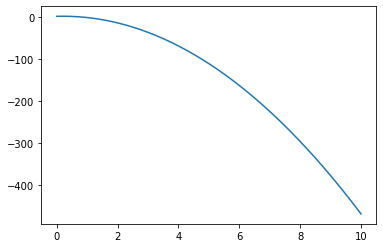

In [58]:
import matplotlib.pyplot as plt
import numpy as np

class Ball:
    def __init__(self,m):
        self.g = -9.81
        self.m = m
        
    def akselerasjon(self):
        self.a = self.g
        return self.a
    
    def sett_initalbetingelse(self,x,v):
        self.x = x
        self.v = v
        
    def integrer(self, T, dt):
        N = int(T/dt)+1
        self.t = np.zeros(N)
        self.s = np.zeros(N)
        v = np.zeros(N)
        self.s[0] = self.x
        v[0] = self.v
        for i in range(N-1):
            v[i+1] = v[i] + self.a*dt
            self.s[i+1] = self.s[i] + v[i]*dt + 0.5*self.a*dt**2
            self.t[i+1] = self.t[i] + dt
        return self.t, self.s
    
    def plott_posisjon(self):
        plt.plot(self.t,self.s)
        plt.show()
    
ball = Ball(2)
ball.sett_initalbetingelse(1,2)
ball.akselerasjon()
ball.integrer(10,1E-5)
ball.plott_posisjon()